# Project Group - 26

Members & Student numbers: 
- Aik van Seters - 4939484
- Laura Drechsel - 4706080
- Dion Mol       - 4943694
- Martijn Koning - 5185904


# Introduction to the Central Research Question

Even if the Netherlands are a small country, there are still quite some differences between
the regions. While the north is somewhat sparsely populated, the western part with nearly
the same area contains 5 times more people. Due to that, the average age of people living
in the western region, which is also often referred to as „Randstad “, is somewhat lower
than the average age of people in the Netherlands in general. It is reasonable to assume,
that those differences in population density and age distribution also had an influence on
mobility behaviour during the corona pandemic.

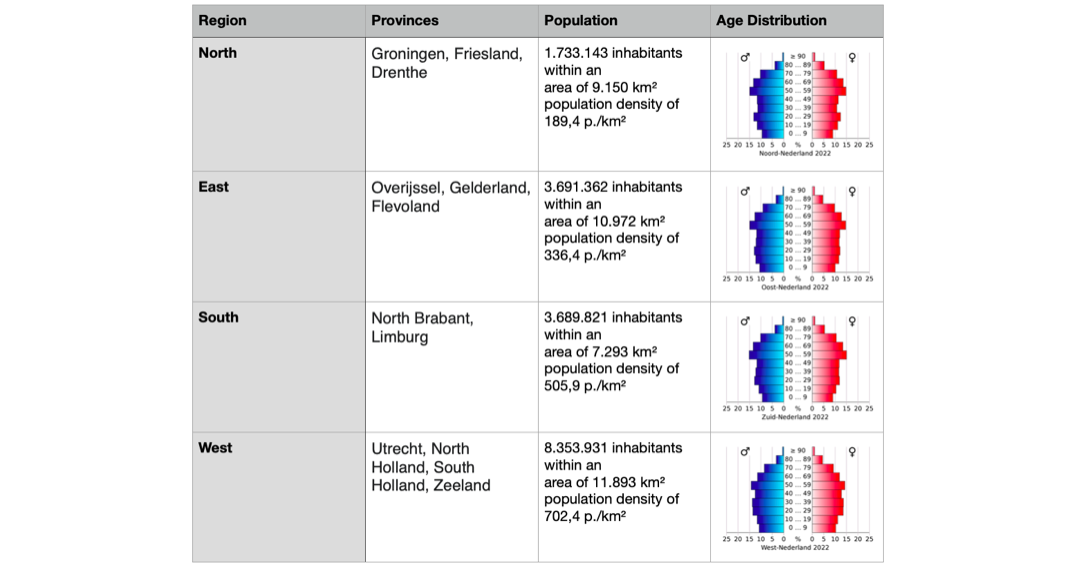

To examine this a little further, we grouped the provinces of the Netherlands in four
regions: North, East, South and West. A short characterisation is found in the picture
above. Our approach is to compare the change in average travelled time and average
travelled distance throughout the years between those different groups, in correlation with
the total hospitalisation rate during that time. Furthermore, we also want to have a closer look on how the severity of corona infections could have changed the travel behaviour in terms of different travel purposes. The investigated travel purposes are listed below:

1. Visits including staying overnight (visting family & friends but not staying in a hotel).
2. Touring/ Walking - includes recreational trips
3. Travel to/from work 
4. Travel to/from school
5. Fun activities
6. Shopping

In order to find a connection, we have formulated the following central research question which we would like to answer within this report:

# Research Objective & SMART Criteria

### Central Research Question: How did COVID-19 affect travel purposes within the different regions of The Netherlands per month? 


**SMART criteria**

**Specific** - This question will focus on how covid-19 infections affected the travel reasons within the Netherlands. The purpose is to find out if this indeed happened, and if so, how much and what categories faced the largest shift?

**Measurable** - Outcomes of the dataset analysis will focus on (1) the different travel reasons, (2) the differences per province, additional: (3) the different age categories within the Netherlands, (4) the changed distance (for instance, someone is maybe more likely to travel more/less distance for a specific occupation during this period).

**Achievable** - Different datasets will be used, gathered over the past years by different data collecting institutions (RIVM data on covid cases, CBS travel reasons).

**Relevant** - Relevance because it is useful to gain insights in the shift in travel reasons within The Netherlands due to the corona pandemic.

**Time-Bound** - This research question focuses on the time period 2018 (the period before corona) until and including the year 2021. The year 2022 is left out of the analysis since data is not gathered of this entire year yet. 


# Contribution Statement

General contribution: we have all contributed to the general structure of the research: e.g. What data had to be compared, how we could compare it and what questions to ask. In addition, what the limitations of our research were and establishing the boundaries of the research.

**Aik van Seeters**: coding for data analysis, coding for visualisation, graph description

**Laura Drechsel**: coding for data analysis, backround research, graph description

**Dion Mol**: oding for data analysis, coding for visualisation, graph description

**Martijn Koning**: coding for visualisation, conceptualisation, graph description

# Data Used

**Data file 1** - source 1: https://data.rivm.nl/covid-19/ We will use this source to analyse the number of cases per municipality/province. Hence, once this data is sorted and analysed, we will try to find any correlations with the data analysed in file 2.

**Data file 2** - source 2: CBS travel reasons data file https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=85055ENG&_theme=1159 The data from this file contains insights within the distance travelled, distance per day, reason for traveling.

When using those 2 data files, we will try to discover if there are any correlations between the phase before corona and during corona in terms of shift in travel purposes. 


# Data Pipeline

**1. Sources**: how are they categorized, what does the data consist of?

**2. Data processing**: (filtering, grouping, augmentation, aggregation) steps - how is the data we have converted to the data we need?

**3. Destination**: data used for making the graphs - specify variables and data used to compare in graphs. Why is the data now able to be compared?


## Data Pipeline: Datafile 1 - Covid Data

**The data needed**: For this analysis we have 2 different sets: 

    - A dataset for the period 2019/2020 
    - A dataset for the period 2020/2021
    
Both will be loaded in lists and the data needs to be converted from safety/security regions into classified by province/province group. 

### Datafile 1 - Formatting the Data

**1.** Merge the datasets together. 

**2.** Group the data by year and month. The purpose of this is to draw a comparison with dataset 2 during a later stage. 

**3.** We filter all the irrelevant data out of the dataset, keeping the data for: Year, Month, Security region code. 

### Datafile 1 - Processing the data
**1.** Creating the provinces & province groups: This is achieved by looping through the whole dataset. The columns i2 (security region code) & i4 (Province group) are the ones we will use.

**2.** We take the code from every row, of which we will strip the text "VR" from it. By doing so, the data only contains numbers. 

**3.** Next, this data will be changed into integers to get the whole number of cases per region and subtract 1 from it. This will create an index number for a list (note: this process could have been done easier by creating a library, which is what we realized later on during the process).

**4.** We then rename the column for name clarity to provinces. 

**5.** Last we group the values by province so that we can determine the province groups.

**6.** The outcome is an overview of the hospitalized Covid-19 cases per month per region within The Netherlands. 
    




## Data Pipeline: Datafile 2 - Travel Purposes per Region

The data that needs to be obtained represents the travel purposes per region within The Netherlands for the years 2019 to 2021. 

### Datafile 2 - Formatting the Data

Firstly, the data from this file is different because it contains metadata. Hence, the code used in the file represents the different purposes that need to be found. Therefore, the metadata needs to be converted to usable data. Secondly, we remove all the data that is irrelevant for our research. 

### Datafile 2 - Processing the data
**1.** In order to scrap unnecessary data, this can be checked if a certain region contains the text "LD". Hence, we uncover this through using a true/false statement. If the text does not contain "LD" it means that the data won't be about regions. We classify "LD" as true, no "LD" as false and filter accordingly. We delete the characteristics without "LD". 

**2.** The same technique is applied for every trip containing ID "2031", which indicates if the row contains monthly or daily data. The daily data will be removed from the set. 

**3.** Next, we delete the data that, after the number 2031, follows a number lower than 160. Hence, this data also represents daily data, which is redundant during out research (so 2031050 would be deleted, 2031161 would not be deleted).

**4.** Remove all the data from margins that have no code: MW00000, because that means that this data doesn’t include all the data we need, such as an upper/lower bound etc.

**5.** Then, data including population key A048709 is deleted because it contains data from 12 years and older. However, the dataset also includes the option 6 years and older. Hence, to get more research data, the data containing age category 12+ is deleted, leaving 6+ data to be analysed. 

**6.** We include all travel keys in the following way: per travel key, all data is split per travel key, creating 7 data frames which will be merged based on duration. 

**7.** Next, we rename the values in the region & trip characteristics so that they represent the province group & month instead of values. 

**8.** At last, the column ID's: Population, and margins are removed because this data is not necessary to answer the CRQ.



# Sub-Research Questions

To answer our research question and test our data we formulated some more detailed subresearch questions:

**Sub-research questions:**  

**Sub-research question 1** -  Has the average travel distance per travel purpose decreased during Covid?

**Sub-research question 2** -  Is the average travel distance per travel correlated to hospital admissions within the different regions of the Netherlands?

**Sub-research question 3** - Has the average travel time per travel purpose decreased during Covid? 

**Sub-research question 4** - Did travel purposes change relative to the number of Covid hospitalizations? If yes what travel purposes changed the most? 


# Conditions

**1. Determine regions**: The provinces in the Netherlands are divided in 4 main regions: Noord, Oost, West, Zuid for visualization purposes. 

**2. Determine the number of travel purposes used**: The number of travel purposes to be compared is dependent on the visualization of the graphs. Therefore, the following 6 purposes are used to keep track of in the data:

1. Visits including staying overnight (visting family & friends but not staying in a hotel).
2. Touring/ Walking - includes recreational trips
3. Travel to/from work 
4. Travel to/from school
5. Fun activities
6. Shopping




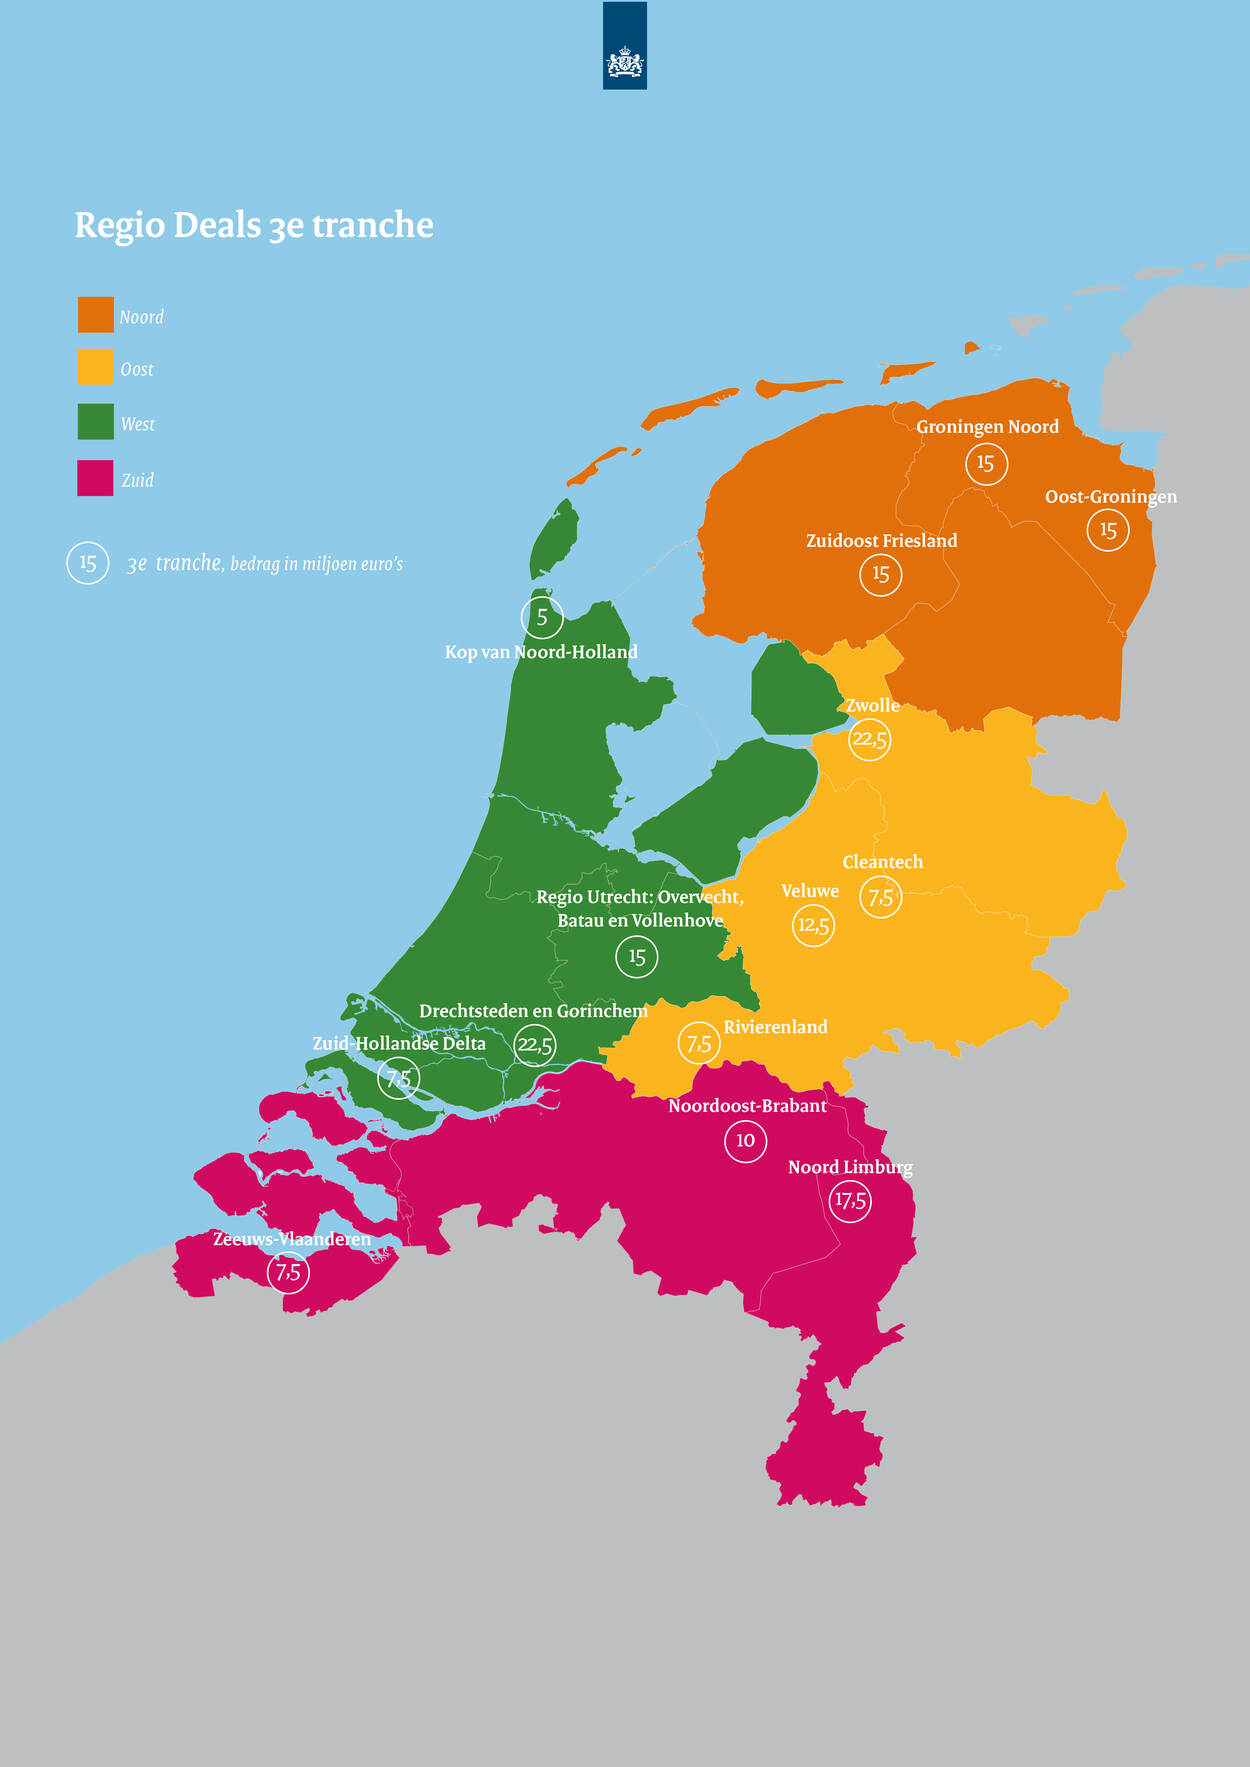

# Graphs & Variables

The following contains an outline of the graphs that will be used in order to answer our central research question (CRQ) and hypothesis stated earlier:

**Graph 1 (for The Netherlands) - scatterplot/line:** 
the number of hospitalizations vs. the average travel time of **The Netherlands**. This is used to mark down peaks in the number of covid cases in The Netherlands in general vs. the average travel distance and and to answer SRQ 1.

**Graph 2 (per region) - Scatterplot/line chart:** the number of hospitalizations vs. the average travel distance in the **different regions** within The Netherlands. This is used to mark down peaks in the number of covid cases in the different regions in general vs. the average travel distances and to answers SRQ 2.

**Graph 3 (per region) - scatter/line :**
Explaining the number of covid cases vs the average travel time per region. The graph is used to answer SRQ 3.

**Graph 4 (per region) - bar chart:**
Explaining the change in average travel distance per month per travel purpose. The chart is used to answer SRQ 4.


**Logarithmic trend lines in Graph 1 & 2:**
Logarithmic functions in graph 1 and 2 were used to display the trend of the average trave distance in connection to the hospital admissions. The points are clearly not arranged in that way that a linear function could have been used. The distance travelled drops quite fast in the beginning when hospital admissions accure and approximates with higher hospital admissions more and more to a stable number. 


# Graph 1: The Number of Hospitalizations vs. The Average Travel Distance in The Netherlands

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [16]:
file_path = 'Data/Processed.csv'
merged = pd.read_csv(file_path, delimiter = ',')

In [17]:
merged_nozero = pd.DataFrame(merged.drop(merged[merged['Hospital_admission'] == float(0)].index))
merged_nozero.sort_values(by=['TotalDist'])

fig = px.scatter(merged_nozero, x='Hospital_admission', y='TotalDist',
                trendline='ols', trendline_options=dict(log_x=True))
fig.update_layout(autotypenumbers='convert types', yaxis={'categoryorder': 'total ascending'})
fig.show()


The graph above shows the relationship between the number of hospital admissions and the average travel distance within the Netherlands. Observing this relationship, one can say that the average travel distance decreases when the number of hospitalizations increases. Even though this graph doesn’t offset the data against a duration axis specifically, making it difficult to see when changes happened. The decrease in this graph can still be compared to the real-life circumstances of the Covid-19 period 2020/2021. For example, since the estimated incubation time of Covid-19 was set to approximately a week, it was able to spread quickly before people realized they were infected (e.g., Carnal, Football matches, big gatherings). Hence, due the government imposing restrictions (closing stores, restaurants, events, and more) people were indirectly forced to stay closer to home. 

We could assume that when hospital admissions accur, people reduce their daily travel quite quickly and therefore distance travelled drops very fast. However, it does not decrease linear with more hospital admissions but approximates more and more to a constant distance, which is displayed by the logarithmic distribution. This can be explained by the fact that in the beginning of rising covid cases, people drop a lot of trips like travelling to school, work or vists which are often further away. Nevertheless there will always be a certain distance for daily errands which will be necessary no matter how many covid cases there are. Subreseach question 1 can therefore clearly answered with yes.

However, this data shows a relationship for The Netherlands as a country, it doesn’t show the relation per region and travel purpose. Nor does it take the average travel time into account. Therefore, the following graphs (2 & 3) will focus on those parts, trying to uncover which regions and purposes faced the largest change and why this could be the case. 

# Graph 2: The Number of Hospitalizations vs. The Average Traveldistance in the **different regions** within The Netherlands

In [18]:
fig = px.scatter(merged_nozero, x='Hospital_admission', y='TotalDist', color='Province_group',
                trendline='ols', trendline_options=dict(log_x=True))
fig.update_layout(autotypenumbers='convert types', yaxis={'categoryorder': 'total ascending'})
fig.show()

The graph above shows the relationship between the number of hospital admissions and the average travel distance within the Netherlands per region. By doing so, it is slightly more detailed than the graph showing the relationship for The Netherlands as a whole. Hence, there are some obvious differences when looking at the regions individually. The graph shows, that while people in the north travel the furthest (which can be explained by the low population density and therefore longer distances that need to be travelled) people in the south have the shortest travel distance. As can be noted, all regions face a decrease in the average travel distance, whereas the most Covid-19 hospitalizations occur in the south and west.

Based on the graph shown above (leaving all external factors out of consideration) sub-research question 1 can be answered with yes. The high number of Covid-19 hospitalizations could be explained by the population density within these regions (west and south) and several big gatherings such as Carnaval in the South. Hence, we could state that there is some correlation between the number of hospitalizations and average travel distance within The Netherlands, but also per region. 

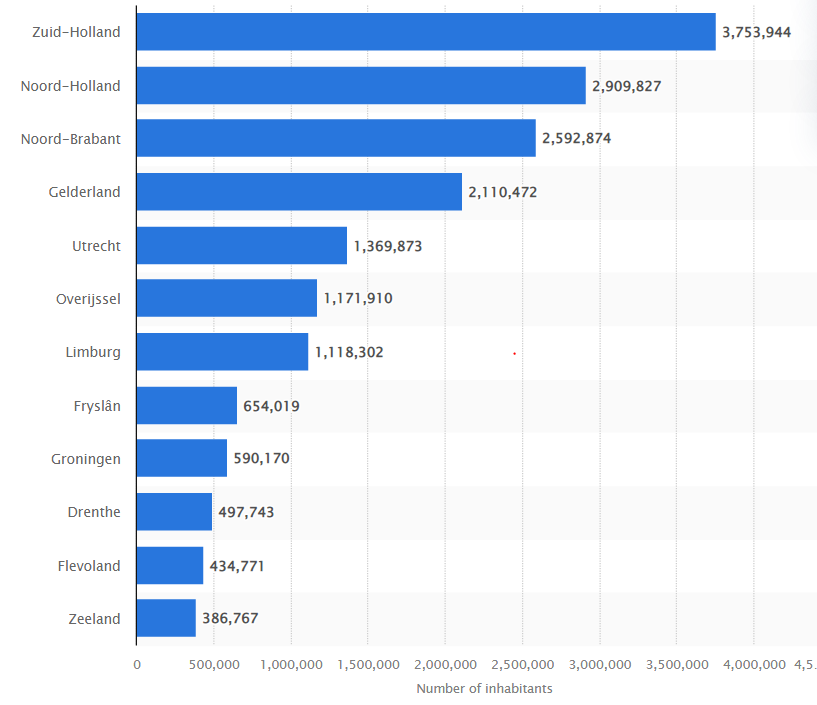

However, one important variable is not taken into consideration in the graph above when trying to answer hypothesis statement 2. This hypothesis does not take into account the average travel time. Therefore, the graph below will try to give some insights into the average travel time and the number of Covid Hospitalizations per region. 



# Graph 3: The Number of Covid Cases VS. The Average Traveltime per region

In [19]:
fig = px.scatter(merged_nozero, x='Hospital_admission', y='TotalTime',
                trendline='ols', trendline_scope='overall', color = 'Province_group')
fig.update_layout(autotypenumbers='convert types', yaxis={'categoryorder': 'total ascending'})
fig.show()

The graph above, a scatter plot with a trend line, shows the correlation of the average travel time per trip per month and the covid-severity measured by the number of hospital admission per month. The different Province-groups are displayed with different colours. 

It can be clearly seen that the western provinces had the highest number of hospital admissions, followed by the southern and eastern provinces. The northern provinces have the lowest number of hospital admissions, which corresponds well with the population size of these regions. 

Even if the average distance travelled per trip decreased with higher hospitalisation rates as seen in graph 2, the sub-research question 3 that the average travel time would also be reduced, cannot be confirmed. The overall trendline shows that the average travel time per trip stays at about 27 minutes, no matter how many hospital admissions there are. This can be explained very well with Marchetti's constant, which is the average time spent by a person travelling per day. Marchetti stated this average time is approximately half an hour for a one-way trip (Marchetti, 1994). 

A related theory is the one from Zahavi, which states that people have a stable daily travel time budget (TTB) and even with increased transport speed people tend to use this saving in travel time to travel further (Zahavi, 1974). Even though the average travel distance decreased, people still used the same budget travel time budget to travel every day. With shorter trips but consistent travel time it can be concluded that the travel speed must have dropped, which can be explained by a shift to slower transport modes like biking or walking instead of using a car. This supports the thesis that can be drawn from Zahavis theory, that there is a basic human appetite for travel. 

Now that the average distance and travel time for travelpurposes are observed in the graphs above, the next step would be trying to discover which travel purpose was affected the most per region. This will be discussed in graph 4. 


# Graph 4: The Average Travel Distance per Month per Travel Purpose

In [20]:
file_path = 'Data/Processed_Purposes.csv'
purposes = pd.read_csv(file_path, delimiter = ',')

In [21]:
fig = px.bar(purposes, x='Province_group', y='Distance', animation_frame='Year-Month', 
             facet_col='Mode', color='Hospital_admission', height=500, range_y=[0,40], hover_name='Distance',
             hover_data=['Hospital_admission'], color_continuous_scale=[[0, 'green'], [0.2, 'yellow'], [0.4, 'orange'], 
             [0.7, 'red'], [1.0, 'purple']], range_color=[0,3500], labels={"Province_group": "", 
                                                                           "Hospital_admission": "Cases"})
fig.update_layout(autotypenumbers='convert types')
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12))

fig.show()

The graph above explains the change in distance travelled per travel purpose per region per month. Observing this graph could give us an answer which could potentially lead to a possible explanation to answer hypothesis statement 4. A bar chart using a slider is used to represent all the different travel purposes per region. By doing so, a change in purpose per month per region can be observed when moving the slider. 

When moving the slider across, one could observe that there is a clear difference in almost every travel purpose when comparing the period before- and during Covid-19. 

However, there are some differences that we could elaborate on: 
For example, as can be seen during the month December for the year 2020, there was no traveling for the purpose “Education”. The reason for this is because the government implemented restrictions, closing all universities for that month. 
Another observation is the period Feb/March of 2020. During that period Carnaval was claimed to be the event that caused a large surge in the number of Covid-19 cases. Hence, moving the slider across we can observe that the number of cases indeed significantly increased from February to March. Another observation is that people did travel less during the month March 2020. Potential causes for this behaviour could be that the government decided to close schools, restaurants/bars and people living in some degree of fear for getting infected.

An obvious change can be recognized in the mode visits. From December 2020 on, the government imposed its most heavy restrictions of the year, trying to limit the number of people celebrating the festive days together. For example, you were only allowed to have few people outside the household coming over per day at a certain time. By doing so, they had hoped that the number of cases would stay down. For this reason, the number of visits remained relatively low compared with the months before when travelling and having guests over was allowed. However, in reality, people would stay over, bike or walk to friends nearby. Those visits are of course hard to include in our data.

It can be noticed, that the travelpurpose Education also has a strong decrease especially during winter 2020 and 2021. This is also strongly correlated to the fact that nearly all schools and universities closed during high covid times.



# Answering the CRQ: 
### How did COVID-19 affect travel purposes within the different regions of The Netherlands per month? 
Looking at the data, we can observe that there could indeed be a correlation between the number of hospitalizations and travel purposes within The Netherlands. More specifically, we could say that the average travel distance decreases when the number of hospitalizations increases per region, where the west and the south of The Netherlands faced the largest increase in hospitalizations. However, average travel time tends to stay the same throughout the whole country, which could draw a link to Y. Zahavi's theory of constant travel time: meaning that the average travel distance could decrease but people still tend to spend an average amount of time travelling and vise versa, faster transportation means that people tend to travel further but on average use the same time to do so. 

Although all travel purposes were affected because of government restrictions, the most obvious changes were observed in the purposes “Education” and “Visits”. This because people were not able to go to schools anymore and visits declined because it was not allowed to have more than a certain number of people over at a time

# Limitations and further research:

During this research several limitations were encountered, which fell mostly into the categories data related limitations and limitations to the research itself:

**Incomplete dataset** – Although both datasets contained quite sufficient data, there was still a proportion of data that was unusable because it was incomplete. Therefore, filtering this data out of the sets means that outcomes could have been slightly different. Dealing with incomplete data meant for us that it became more difficult to notice the exact moments of restriction implementations in the data. For example, some regions do not contain any data, such as the regions North for travel purpose “Visits”, which is unthinkable during the festive days. 

**Monthly data** – in conjunction with the above, another reason why it was more difficult to notice exact changes was because we analysed monthly data. Therefore, direct day to day effects is still hidden in monthly data. For example, when cases were rapidly increasing and the government would impose new restrictions on a certain day within that month, it would have been interesting to see how people would respond the days following. However, due to monthly data analysis we were not able to.  Moreover, the same applies for festive days. 

**Timebound** – Time restrictions always apply, there were only several timeslots over a couple of weeks in which we were able to do research. Hence, more time for research would most likely mean a more calibrated outcome. 




**Further research:** 

During this research the focus was on hospitalizations and travel purpose which showed some correlation between the different travel purposes and the hospitalizations. However, it would also be interesting to conduct research on a much smaller time frame. For example, how did people react after the announcement of new restrictions being implemented? Did people go out the night before causing a surge in the number of cases? If yes, what did they do? Or did they not at all, staying home because of the fear of being infected. 


# Theories used to answer questions:

**Sources:** 

Zahavi, Y., Travetime budgets and mobility in urban areas, Washington, DC  United States  20590, Publication Date: 1974-5, https://rosap.ntl.bts.gov/view/dot/12144

Marchetti, C. (September 1994). "Anthropological invariants in travel behavior" (PDF). Technological Forecasting and Social Change. 47 (1): 75–88. doi:10.1016/0040-1625(94)90041-8.
